### Import Required Libraries 

In [26]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,AveragePooling2D,Flatten
from keras import Sequential
from keras.datasets import mnist

### Splitting the training and testing dataset

In [27]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [28]:
from PIL import Image
img = Image.fromarray(x_train[1])
img

In [29]:
x_train=tensorflow.pad(x_train,[[0,0],[2,2],[2,2]])/255
x_test=tensorflow.pad(x_test,[[0,0],[2,2],[2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [30]:
x_train

<tf.Tensor: shape=(60000, 32, 32), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

In [31]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
x_train=tensorflow.expand_dims(x_train,axis=3,name=None)
x_test=tensorflow.expand_dims(x_test,axis=3,name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [33]:
x_val=x_train[-2000:,:,:,:]
y_val=y_train[-2000:]
x_train=x_train[:-2000,:,:,:]
y_train=y_train[:-2000]

### LeNet Architecture

In [34]:
model = Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 120)              

In [36]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [43]:
history=model.fit(x_train,y_train,batch_size=64,epochs=15,validation_data=(x_val,y_val))

Epoch 1/15
907/907 [==============================] - 24s 26ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0679 - val_accuracy: 0.9910
Epoch 2/15
907/907 [==============================] - 26s 29ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0667 - val_accuracy: 0.9920
Epoch 3/15
907/907 [==============================] - 25s 28ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0672 - val_accuracy: 0.9910
Epoch 4/15
907/907 [==============================] - 26s 29ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0755 - val_accuracy: 0.9895
Epoch 5/15
907/907 [==============================] - 25s 28ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0578 - val_accuracy: 0.9910
Epoch 6/15
907/907 [==============================] - 23s 25ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.0761 - val_accuracy: 0.9895
Epoch 7/15
907/907 [==============================] - 24s 26ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0655 - val_accuracy:

### Model Accuracy

In [46]:
y_prob = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [47]:
y_pred = y_prob.argmax(axis=1)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9874

### Plotting The Loss Curve

In [44]:
import matplotlib.pyplot as plt

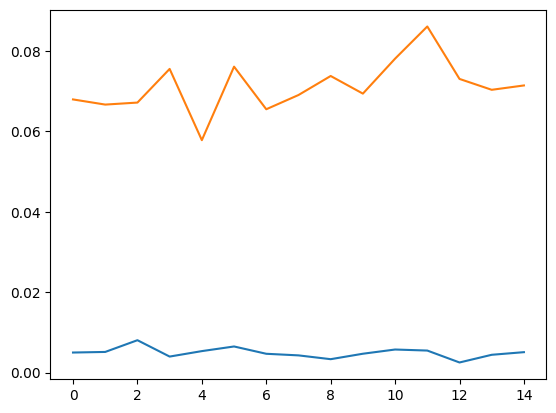

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])